# <center> Bayesian Classifier using MAP Rule </center>

In [7]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [32]:
def GMM_fit(n_comp,X):
    gmm = GaussianMixture(n_components=n_comp)
    gmm.fit(X)
    gmm_weights = gmm.weights_
    gmm_means = gmm.means_
    gmm_cov = gmm.covariances_
    return(gmm_weights,gmm_means,gmm_cov)

In [33]:
def GMM_predict(X,weights,means,cov):
    sum1 = 0
    for i in range(means.shape[0]):
        rv = multivariate_normal(means[i,:], cov[i,:,:])
        prob = rv.pdf(X)
        sum1 += prob*weights[i]
    return(sum1)

In [34]:
data = np.genfromtxt("letter_bal.csv",delimiter=",")
X = data[:,:-1]
y = data[:,-1]

y_unq = np.unique(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y)
print(X_train.shape)
unq_labels,count = np.unique(y_unq,return_counts=True)
prior = count/sum(count)

data_ls = [[] for i in range(len(unq_labels))]

for i in range(X_train.shape[0]):
    for j in range(1,len(data_ls)+1):
        if(y_train[i]==j):
            data_ls[j-1].append(X_train[i])
            

data_ls = [np.matrix(data_ls[i]) for i in range(len(data_ls))]

acc_ls = []
comp_array = np.arange(1,7,2) #[1,3,5]

for k in range(len(comp_array)):
    mean_ls = []
    cov_ls = []
    wt_ls = []
    for i in range(len(data_ls)):
        gmm_weights,gmm_means,gmm_cov = GMM_fit(comp_array[k],data_ls[i])
        wt_ls.append(gmm_weights)
        mean_ls.append(gmm_means)
        cov_ls.append(gmm_cov)

    pred_ls = []
    for i in range(X_test.shape[0]):
        y_pred = []
        for j in range(len(data_ls)):
            lkl = GMM_predict(X_test[i],wt_ls[j],mean_ls[j],cov_ls[j])
            posterior = lkl*prior[j]
            y_pred.append(posterior)
        idx = np.argmax(y_pred)
        y_final = y_unq[idx]
        pred_ls.append(y_final)

    pred_arr = np.array(pred_ls).astype(int)
    acc = accuracy_score(y_test,pred_arr)
    acc_ls.append(acc)

(23625, 16)


In [13]:
acc_ls

[0.8875063484002031, 0.9559421025901473, 0.9763839512442865]

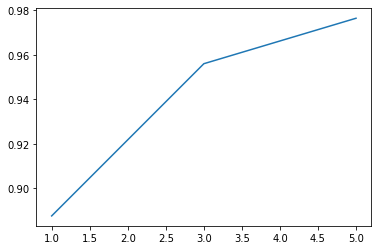

In [14]:
plt.plot(comp_array,acc_ls)

In [37]:
print(confusion_matrix(y_test,pred_arr))

[[303   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 284   0   0   0   2   0   0   0   0   4   0   0   0   0   0   0   5
    0   2   0   6   0   0   0   0]
 [  0   0 296   0   0   0   3   0   0   0   0   0   0   0   2   0   0   0
    0   0   1   0   0   0   0   0]
 [  0   1   0 293   0   0   0   3   0   0   0   0   0   2   3   0   0   0
    0   0   1   0   0   0   0   0]
 [  0   0   0   0 293   1   3   0   0   0   0   2   0   0   0   1   0   2
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   2 287   0   0   1   2   0   0   0   0   0  10   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   2   0 298   0   0   0   0   1   1   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   2   0   2   0   0   3 283   0   0   4   0   0   2   0   1   0   3
    0   0   3   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 295   8   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0   0  

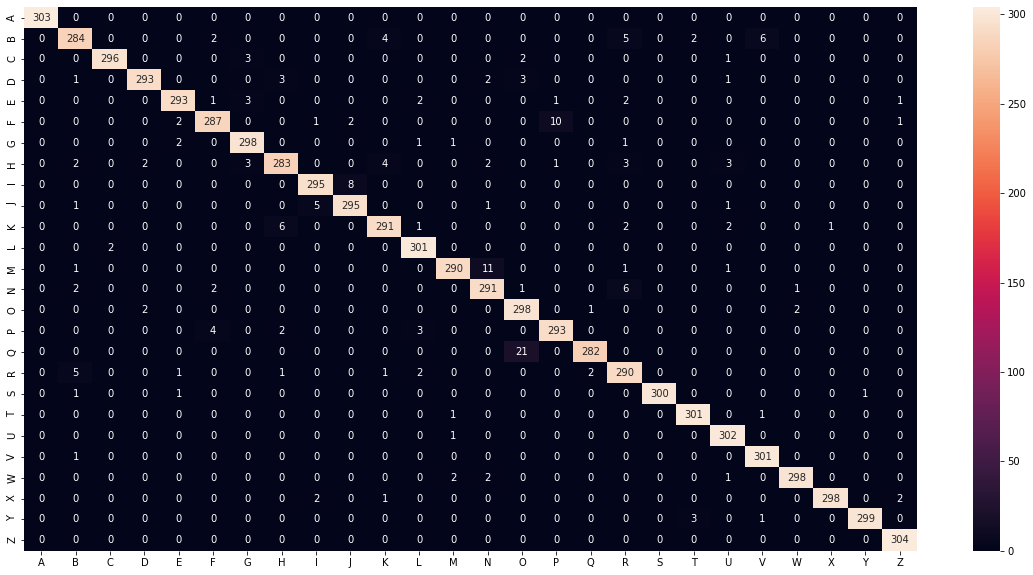

In [36]:
x_ax = [chr(a) for a in range(65,91)]

fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(confusion_matrix(y_test,pred_arr),annot=True,fmt='g',xticklabels=x_ax,yticklabels=x_ax)
plt.show()

In [21]:
print("Macro f1 score is {}".format(f1_score(y_test,pred_arr,average='macro')))
print("Micro f1 score is {}".format(f1_score(y_test,pred_arr,average='micro')))
print("Weighted f1 score is {}".format(f1_score(y_test,pred_arr,average='weighted')))
print(f1_score(y_test,pred_arr,average=None))

Macro f1 score is 0.9763951134469728
Micro f1 score is 0.9763839512442865
Weighted f1 score is 0.9764029577515809
[1.         0.95881384 0.97342193 0.95908347 0.97190083 0.94909688
 0.97152429 0.94416244 0.98333333 0.99178982 0.97689769 0.98697068
 0.99835796 0.97512438 0.93375394 0.96333333 0.95711835 0.96247961
 0.99178982 0.98349835 0.99504132 0.98684211 0.99507389 0.99335548
 0.98679868 0.99671053]


In [20]:
f1_score?